In [23]:
import os
import pandas as pd
import geopandas as gpd
import contextily as ctx
ctx_src = ctx.providers.OpenStreetMap.Mapnik
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 200)

DROOT = os.path.join('./1-data/')
drootf = lambda path: os.path.join(DROOT, path)

,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry,kmarea
0,3273.0,2020,1963,28,Zuid-Holland,Hoeksche Waard,"POLYGON ((4.43784 51.79863, 4.43785 51.79863, ...",0.710729


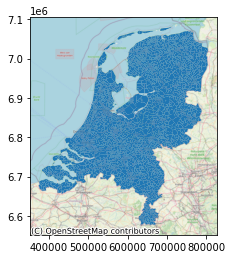

In [4]:
pc_gdf = gpd.read_file('./1-data/georef-netherlands-postcode-pc4/')
pc_gdf.pc4_code = pc_gdf.pc4_code.astype(float)
pc_gdf['kmarea'] = pc_gdf.to_crs(pc_gdf.estimate_utm_crs()).area / 10e6 # to Km2

ax = pc_gdf.to_crs(epsg=3857).plot()
ctx.add_basemap(ax=ax, source=ctx_src)
pc_gdf.head(1)

In [24]:
df = pd.concat([
    pd.read_csv(drootf('ODiN/ODiN2021_Databestand.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(drootf('ODiN/ODiN2022_Databestand.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(drootf('ODiN/ODiN2018_Databestand_v2.0.csv'), sep=';', encoding= 'unicode_escape'),
    pd.read_csv(drootf('ODiN/ODiN2019_Databestand_v2.0.csv'), sep=';', encoding= 'unicode_escape')
])
df.describe()

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,VertPC,VertPCBL,AankPC,AankPCBL,PCG,PCBLG,RVertStat,RAankStat,FactorH,FactorP,FactorV,WrkVervw,WrkVerg,VergVast,VergKm,VergBrSt,VergOV,VergAans,VergVoer,VergBudg,VergPark,VergStal,VergAnd,BerWrk,RdWrkA,RdWrkB,BerOnd,RdOndA,RdOndB,BerSup,RdSupA,RdSupB,BerZiek,RdZiekA,RdZiekB,BerArts,RdArtsA,RdArtsB,BerStat,RdStatA,RdStatB,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB
count,771151.000000,7.711510e+05,771151.000000,771151.0,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,575913.000000,396822.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,396822.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,396822.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,771151.000000,729401.000000,729401.000000,729401.000000,729401.000000,729401.000000,729401.000000,725720.000000,725720.000000,771151.000000,771151.000000,771151.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.00000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000,200054.000000
mean,0.310803,1.236527e+11,1.807059,1.0,2.837407,2.617843,2.879620,0.162067,0.292495,0.312308,2.074526,4447.900237,707.805665,2.454273,5.401701,7.737549,23.118126,1443.685015,17.775113,15.97

In [25]:
df.OPID.value_counts()

56082377822     31
65323474257     30
65227197402     25
55961597513     25
56144584065     24
                ..
59120344435      1
302248985980     1
302569761980     1
55930450294      1
301250983980     1
Name: OPID, Length: 239676, dtype: int64

In [26]:
df.AantRit.value_counts()

1         622013
3          52233
#NULL!     45431
2          27384
4          17308
5           5180
6            786
7            539
9             81
8             72
15            45
12            36
11            33
10            10
Name: AantRit, dtype: int64

In [27]:
df.groupby(['KMotiefV']).size()

KMotiefV
#NULL!     41750
1         129539
2          25122
3          23519
4         144686
5          61279
6          72898
7         128693
8          64560
9          79105
dtype: int64

In [28]:
df.drop_duplicates(['AankPC', 'VertPC']).shape

(179503, 247)

In [95]:
df = df[df.VertPC.notna() & (df.VertPC != 0.0) & (df.KRvm != '#NULL!')]

KRvm_t = {
    '1': "Personenauto - bestuurder",
    '2': "Personenauto - passagier",
    '3': "Trein",
    '4': "Bus/tram/metro",
    '5': "Fiets",
    '6': "Te voet",
    '7': "Overig",
}
df['KRvm_t'] = df.KRvm.replace(KRvm_t)


df.head(2)

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,MRDH,Utr,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqLopen,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,FqMotor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,VertMRDH,VertUtr,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,AankMRDH,AankUtr,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,WrkVervw,WrkVerg,VergVast,VergKm,VergBrSt,VergOV,VergAans,VergVoer,VergBudg,VergPark,VergStal,VergAnd,BerWrk,RdWrkA,RdWrkB,BerOnd,RdOndA,RdOndB,BerSup,RdSupA,RdSupB,BerZiek,RdZiekA,RdZiekB,BerArts,RdArtsA,RdArtsB,BerStat,RdStatA,RdStatB,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB,KRvm_t
0,1,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725401,1,0,1,9,8,6,3,12,1,0,1363.0,1.0,34,5,40,15,18,21,0,1319.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,16,0,9,16,15,15,4,210,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540101,1,75,0,7,1,2,3,2,16,0,16,15,15,0,0.0,0.0,13,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personenauto - passagier
1,0,62344107254,1,1,3,3,3,1,0,0,2,1363,34,2,7,5,40,0,15,18.0,21.0,2,38,9,1,3,0,2,4,10,10,8,9,9,2,0,2,1,0,1,2,1,1,2,0,0,2011,2,3,1,7,7,6,9995,9,7,3,1,0,0,2018,4,3,0,0,0,0,0,0,0,2,3,9.0,3,5,5,5,2,2,5,9.0,0,2021,1,2,17,1,0,1,0,0,0,0,2,0,0,5,2,2,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,30,150,0,1,6234410725402,2,0,1,1,8,6,3,12,4,0,1319.0,1.0,34,5,40,15,18,21,0,1363.0,1.0,34,5,40,15,18,21,0.0,0,0.0,75,7,1,2,2,19,45,12,20,0,15,4,#NULL!,1,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,623441072540201,1,75,0,7,1,2,3,2,19,45,20,0,15,0,0.0,0.0,13,0,0,94,188,68606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personenauto - passagier


(712865, 248) (226091, 248)


,VertPC,Bus/tram/metro,Fiets,Overig,Personenauto - bestuurder,Personenauto - passagier,Te voet,Trein,trips_n,trips_n_unweighted,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry,kmarea
0,1011.0,2199996.0,6161719.0,484708.0,968216.0,500797.0,5873762.0,657031.0,16846229.0,134.0,1011.0,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ...",0.097517
1,1012.0,3704903.0,5230457.0,374849.0,1144533.0,530527.0,7314227.0,1429498.0,19728994.0,170.0,1012.0,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.90362 52.38179, 4.90467 52.38148, ...",0.116035
2,1013.0,3569508.0,12734898.0,1179110.0,2102813.0,1856759.0,10856483.0,2758389.0,35057960.0,299.0,1013.0,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.87390 52.40932, 4.87916 52.40553, ...",0.490006


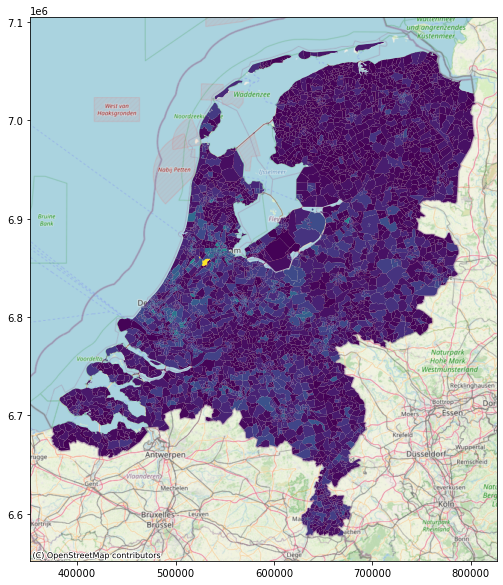

In [118]:
df1 = df[df.VerplNr == '1'] # Drop all non-unique trips. 
print(df.shape, df1.shape)
query_u = df1.pivot_table(index='VertPC', columns='KRvm_t', aggfunc='count', values='AankGem', fill_value=0.) # Unweighted
query   = df1.pivot_table(index='VertPC', columns='KRvm_t', aggfunc='sum', values='FactorV', fill_value=0.) # Weighted
modes = list(query.columns)
query['trips_n']            = query.sum(axis=1)
query['trips_n_unweighted'] = query_u.sum(axis=1)
query = query.reset_index()

query = gpd.GeoDataFrame(pd.merge(query, pc_gdf, left_on='VertPC', right_on='pc4_code', how='outer'))
query.trips_n = query.trips_n.fillna(0)

ax = query.to_crs(epsg=3857).plot(column='trips_n', figsize=(10,10))
ctx.add_basemap(ax, source=ctx_src)

query.head(3)

Of all PC4 areas, 57.6% have less than 50 trips departing.


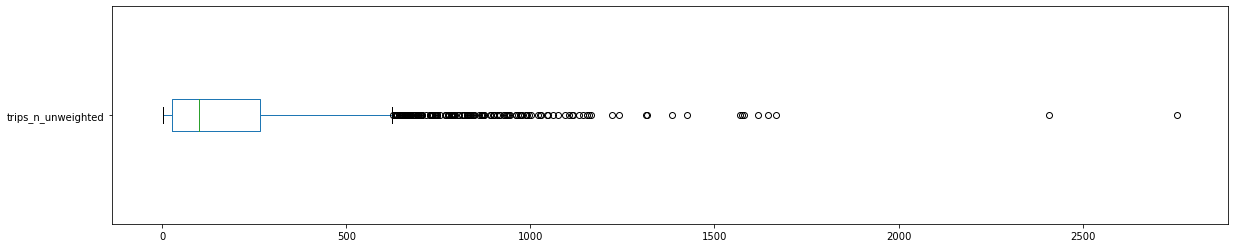

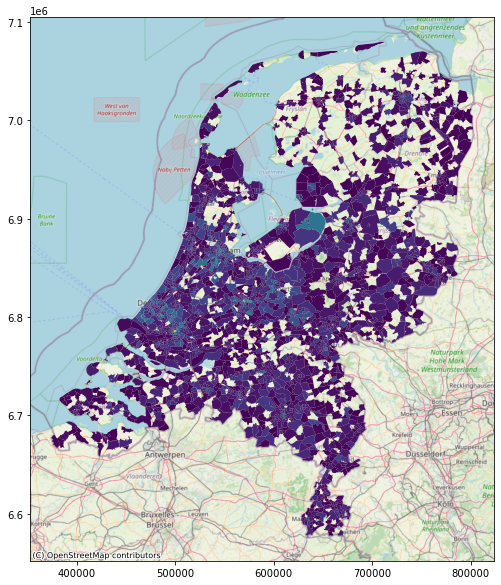

In [112]:
thresh = 50
perc_unavailable = (query.trips_n_unweighted < thresh).sum() / (query.trips_n_unweighted >= thresh).sum() * 100
query.trips_n_unweighted.plot.box(vert=False, figsize=(20,4), whis=1.5)

query1 = query[query.trips_n_unweighted >= thresh]
print(f"Of all PC4 areas, {perc_unavailable:.1f}% have less than {thresh} trips departing.")

ax = query1.to_crs(epsg=3857).plot(column='trips_n_unweighted', figsize=(10,10))
ctx.add_basemap(ax, source=ctx_src)

In [113]:
query2 = query1
query2[modes] = query2[modes].div(query2.trips_n, axis=0)
query2.head(2)

/Users/ivo/opt/anaconda3/envs/thesis-env/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,VertPC,Bus/tram/metro,Fiets,Overig,Personenauto - bestuurder,Personenauto - passagier,Te voet,Trein,trips_n,trips_n_unweighted,pc4_code,year,gem_code,prov_code,prov_name,gem_name,geometry,kmarea
0,1011.0,0.106982,0.320499,0.028283,0.057348,0.025448,0.384636,0.076804,92559611.0,869.0,1011.0,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.90562 52.37935, 4.90562 52.37935, ...",0.097517
1,1012.0,0.199388,0.229239,0.024646,0.052385,0.031352,0.350988,0.112002,165985766.0,1666.0,1012.0,2020,363,27,Noord-Holland,Amsterdam,"POLYGON ((4.90362 52.38179, 4.90467 52.38148, ...",0.116035


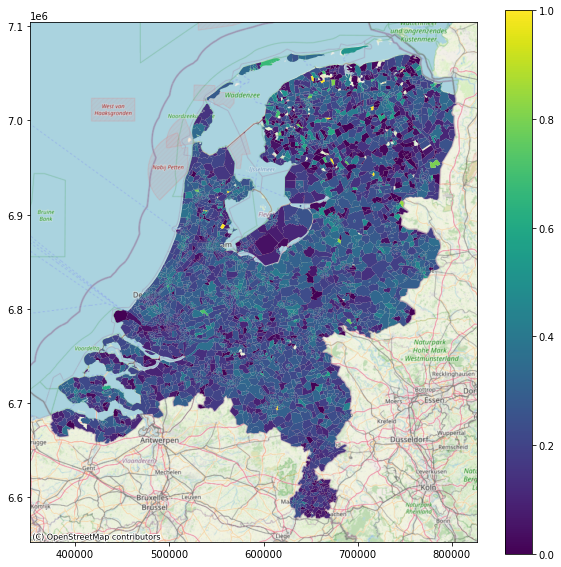

In [115]:
query['fiets_frac'] = query['Fiets'] / query.trips_n
ax = query.to_crs(epsg=3857).plot(column='fiets_frac', figsize=(10,10), legend=True)
ctx.add_basemap(ax, source=ctx_src)